Insurance_Dataset

In [2]:
import pandas as pd
df=pd.read_csv(r"c:\DATA SCIENCE\Machine Learning\Data_Sets\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.isnull().sum()


age                 0
bought_insurance    0
dtype: int64

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [5]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


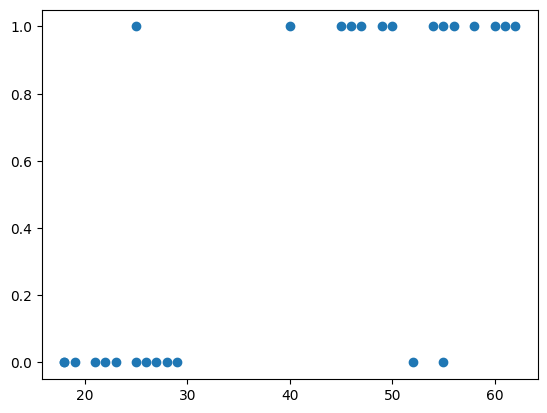

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df["age"],df["bought_insurance"])

<Axes: xlabel='bought_insurance', ylabel='Count'>

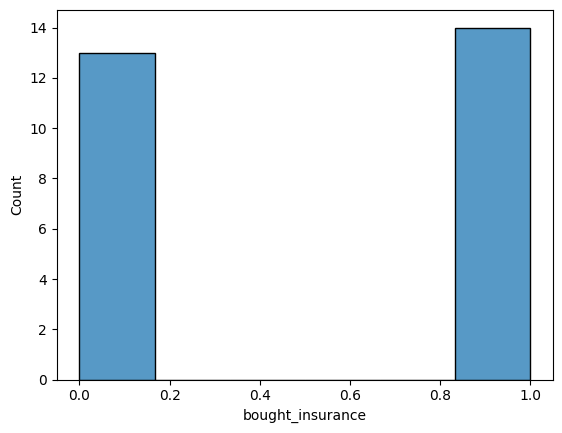

In [34]:
sns.histplot(df["bought_insurance"])

<Axes: >

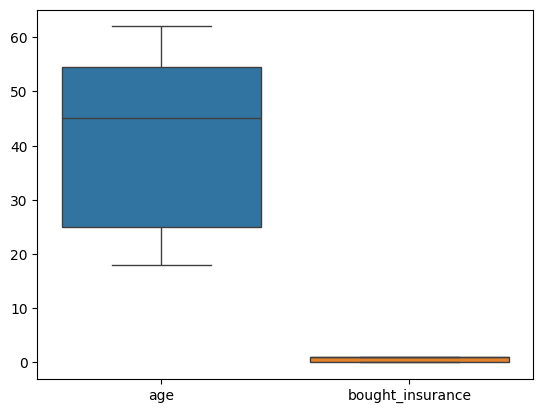

In [19]:
sns.boxplot(data=df)

<Axes: >

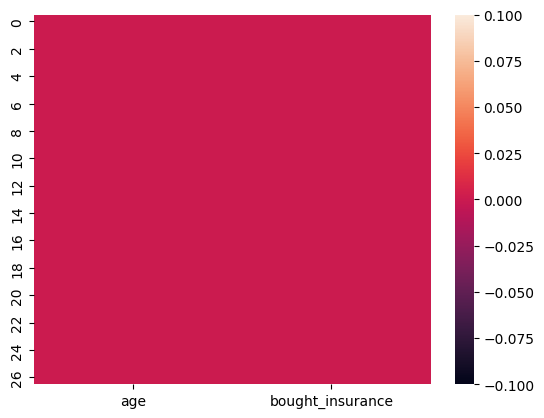

In [18]:
import seaborn as sns
sns.heatmap(df.isnull())

In [43]:
x=df[["age"]]                    #here x value is in 2d array
y=df["bought_insurance"]         

In [66]:
#used for spliting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)         #random state takes that randomlly number
print(x_train.shape)
print(x_test.shape)

(20, 1)
(7, 1)


In [67]:
#building the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
prediction=model.predict(x_test)
prediction

array([1, 0, 1, 0, 0, 0])

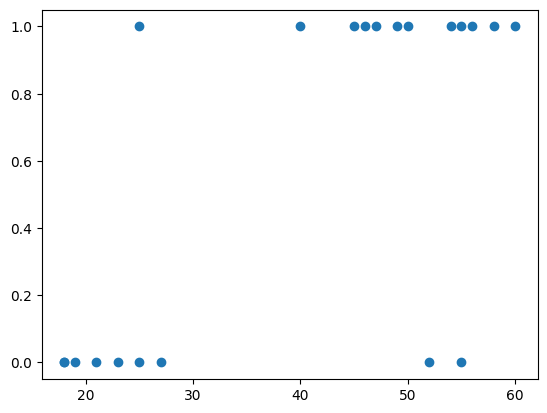

In [61]:
plt.scatter(x_train,y_train)


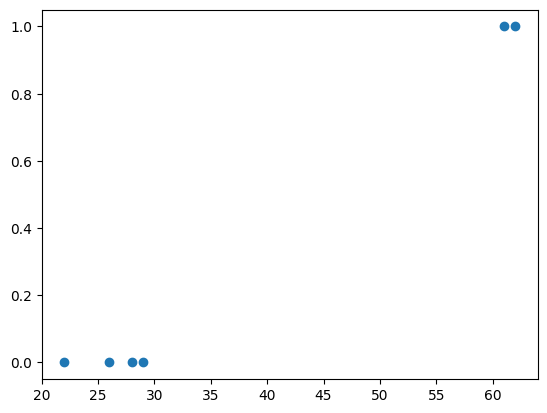

In [62]:
plt.scatter(x_test,prediction)


In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix
accu=accuracy_score(y_test,prediction)
c_matrix=confusion_matrix(y_test,prediction)
print(accu)
print(c_matrix)


1.0
[[4 0]
 [0 2]]


In [30]:
#for getting the s shape curve
import numpy as np
age_range=np.linspace(df["age"].min(),df["age"].max(),30).reshape(-1,1)# reshaping into 2 d array
#print(age_range)            #this will be our x values
predict = model.predict_proba(age_range)[:, 1]      #probability estimation    
for x, y in zip(age_range, predict):#pairs each values
    print(f"x:{x[0]:.2f},y :{y:.2f}")
predict1 = model.predict(age_range)

x:18.00,y :0.01
x:19.52,y :0.02
x:21.03,y :0.02
x:22.55,y :0.03
x:24.07,y :0.04
x:25.59,y :0.05
x:27.10,y :0.06
x:28.62,y :0.08
x:30.14,y :0.10
x:31.66,y :0.12
x:33.17,y :0.15
x:34.69,y :0.19
x:36.21,y :0.23
x:37.72,y :0.28
x:39.24,y :0.34
x:40.76,y :0.40
x:42.28,y :0.46
x:43.79,y :0.52
x:45.31,y :0.59
x:46.83,y :0.65
x:48.34,y :0.71
x:49.86,y :0.76
x:51.38,y :0.80
x:52.90,y :0.84
x:54.41,y :0.87
x:55.93,y :0.90
x:57.45,y :0.92
x:58.97,y :0.94
x:60.48,y :0.95
x:62.00,y :0.96


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


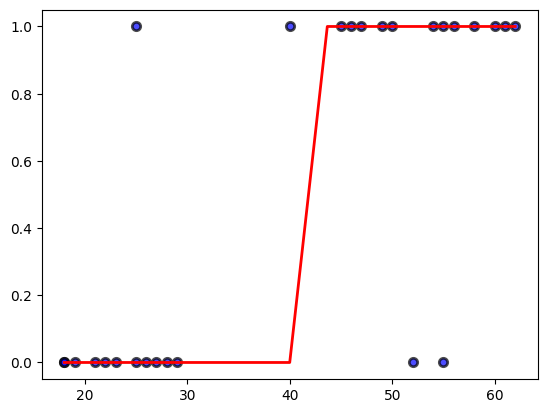

In [26]:
plt.scatter(df["age"],df["bought_insurance"],linewidth=2,color='blue', edgecolor='k', alpha=0.7, label='Actual Data')
plt.plot(age_range,predict1, color="red", linewidth=2, label='Logistic Regression Curve')

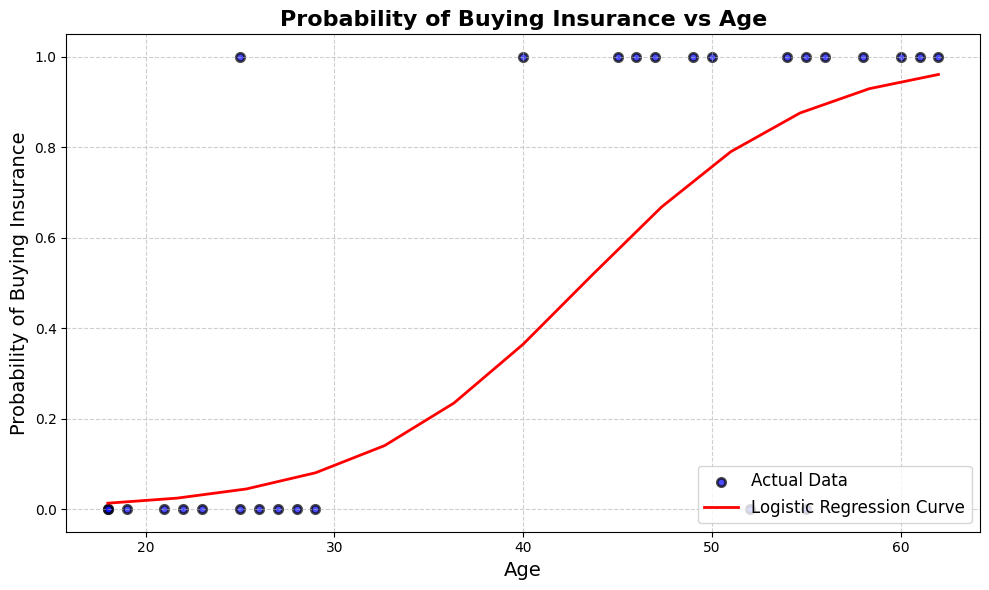

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df["age"],df["bought_insurance"],linewidth=2,color='blue', edgecolor='k', alpha=0.7, label='Actual Data')
plt.plot(age_range,predict, color="red", linewidth=2, label='Logistic Regression Curve')
plt.title("Probability of Buying Insurance vs Age", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Probability of Buying Insurance", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

##logistic regression  multiclass classification

In [ ]:
#it is related to more then two classes,
#it is extension of logistic regression,